In [83]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [84]:
world = pd.read_csv("world.csv")
world.head()

,Country Name,Time,Country Code,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]","Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],Individuals using the Internet (% of population) [IT.NET.USER.ZS],...,"Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%) [SH.DYN.NCOM.FE.ZS]","Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population) [SH.STA.AIRP.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population) [SH.STA.AIRP.FE.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5]","Mortality rate attributed to unintentional poisoning, female (per 100,000 female population) [SH.STA.POIS.P5.FE]","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]",People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS],"People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS]
0,Afghanistan,2016,AFG,97.09935985,1.918810496,33.981,36.4,44.1,3.120401382,11.2,...,27.7,211.1,195,229,1.9,13.9,64.28648363,42.05418277,59.9219787,46.4
1,Albania,2016,ALB,100,0.15693402,12.08,2.9,93.1,177.7584991,66.3634447,...,13.1,68,55,82,0.4,0.2,91.02037015,97.70487655,98.28801438,24.9
2,Algeria,2016,DZA,99.97308153,0.116624156,25.25,14.8,75.7,176.265213,42.94552688,...,13.2,49.7,44,55,0.6,1.9,93.51585098,87.54231646,89.67236867,30
3,American Samoa,2016,ASM,..,..,..,..,..,..,..,...,..,..,..,..,..,..,99.69643741,55.60755445,..,..
4,Andorra,2016,AND,100,..,8.8,..,..,1883.995361,97.93063712,...,..,..,..,..,..,..,100,100,100,12.8


In [85]:
life = pd.read_csv('life.csv')
life.head()

,Country,Country Code,Year,Life expectancy at birth (years)
0,Afghanistan,AFG,2016,Low
1,Albania,ALB,2016,High
2,Algeria,DZA,2016,High
3,Angola,AGO,2016,Low
4,Antigua and Barbuda,ATG,2016,Medium


In [86]:
for index, row in world.iterrows():
    if not (row['Country Code'] in list(life['Country Code'])):
        #print(row['Country Name'])
        world.drop(index, inplace=True)
print(len(life))
print(len(world))

183
183


In [87]:
features = world.columns[3:]

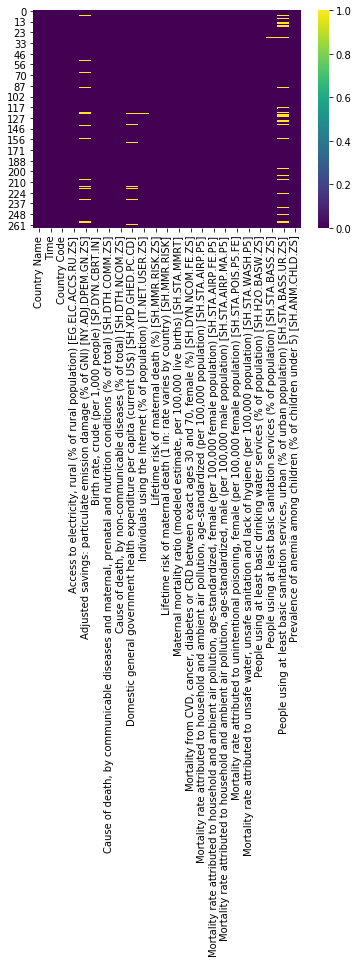

In [88]:
sns.heatmap(world=="..", cmap="viridis")

In [89]:
world_life_expect = []
for index, row in world.iterrows():
    for index2, row2 in life.iterrows():
        if row['Country Code'] == row2['Country Code']:
            world_life_expect.append(row2['Life expectancy at birth (years)'])
            break
world['Life expectancy at birth (years)'] = world_life_expect
world.head()
# I am linking the datsets

,Country Name,Time,Country Code,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]","Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],Individuals using the Internet (% of population) [IT.NET.USER.ZS],...,"Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population) [SH.STA.AIRP.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population) [SH.STA.AIRP.FE.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5]","Mortality rate attributed to unintentional poisoning, female (per 100,000 female population) [SH.STA.POIS.P5.FE]","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]",People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS],"People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS],Life expectancy at birth (years)
0,Afghanistan,2016,AFG,97.09935985,1.918810496,33.981,36.4,44.1,3.120401382,11.2,...,211.1,195,229,1.9,13.9,64.28648363,42.05418277,59.9219787,46.4,Low
1,Albania,2016,ALB,100,0.15693402,12.08,2.9,93.1,177.7584991,66.3634447,...,68,55,82,0.4,0.2,91.02037015,97.70487655,98.28801438,24.9,High
2,Algeria,2016,DZA,99.97308153,0.116624156,25.25,14.8,75.7,176.265213,42.94552688,...,49.7,44,55,0.6,1.9,93.51585098,87.54231646,89.67236867,30,High
5,Angola,2016,AGO,0,0.629412833,41.882,63.4,27.4,42.02880478,13,...,118.5,117,120,2,48.8,55.08427629,48.62794479,63.33675598,50.9,Low
6,Antigua and Barbuda,2016,ATG,100,..,15.717,11.9,81.8,310.3971863,73,...,29.9,24,37,0.4,0.1,96.73918628,87.50428238,..,32.3,Medium


In [90]:
world_link = world[['Country Name', 'Time', 'Country Code']]
world.drop(['Country Name', 'Time', 'Country Code'], axis = 1, inplace=True)
world.replace(["..", np.nan], inplace=True)

Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]                                                                          None
Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS]                                                                      None
Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]                                                                                             None
Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]                            None
Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]                                                                        None
Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD]                                                       None
Individuals using the Internet (% of population) [IT.NET.USER.ZS]                             

In [91]:
X = world
y = life['Life expectancy at birth (years)']
world.drop(['Life expectancy at birth (years)'], axis = 1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [92]:
imp_median_train = SimpleImputer(missing_values=np.nan, strategy="median")
imp_median_test = SimpleImputer(missing_values=np.nan, strategy="median")
imp_median_train.fit(X_train)
imp_median_test.fit(X_test)
print(imp_median.transform(X_train))

[[9.49394035e+01 3.75064605e-01 1.87900000e+01 ... 7.12531327e+01
  7.91616563e+01 3.68000000e+01]
 [8.93123946e+01 1.92163154e-01 1.90420000e+01 ... 8.41405219e+01
  8.94054960e+01 3.43000000e+01]
 [1.00000000e+02 6.11692990e-02 1.08000000e+01 ... 9.95972293e+01
  9.95971803e+01 1.27000000e+01]
 ...
 [6.74291582e+00 9.12831481e-01 3.71710000e+01 ... 2.18889934e+01
  3.30148102e+01 7.44000000e+01]
 [1.00000000e+02 2.22371625e-01 9.10000000e+00 ... 8.59933057e+01
  8.67803838e+01 2.69000000e+01]
 [1.00000000e+02 4.76840280e-02 1.00000000e+01 ... 9.99748135e+01
  9.99565038e+01 1.26000000e+01]]


In [93]:
imputed_train = pd.DataFrame(imp_median.transform(X_train))
imputed_test = pd.DataFrame(imp_median.transform(X_test))
imputed_train.columns = features
imputed_test.columns = features
imputed_train.head()

,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]","Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],Individuals using the Internet (% of population) [IT.NET.USER.ZS],Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS],Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK],"Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%) [SH.DYN.NCOM.FE.ZS]","Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population) [SH.STA.AIRP.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population) [SH.STA.AIRP.FE.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5]","Mortality rate attributed to unintentional poisoning, female (per 100,000 female population) [SH.STA.POIS.P5.FE]","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]",People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS],"People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS]
0,94.939403,0.375065,18.790,20.7,73.3,49.898766,25.447354,0.440175,230.0,184.0,22.6,112.4,94.0,134.0,0.2,7.1,88.656534,71.253133,79.161656,36.8
1,89.312395,0.192163,19.042,13.3,75.9,220.422394,45.400000,0.308329,320.0,121.0,17.2,56.7,42.0,74.0,0.3,2.0,94.519398,84.140522,89.405496,34.3
2,100.000000,0.061169,10.800,6.5,89.7,4681.911621,96.967785,0.006749,14800.0,4.0,9.5,13.2,11.0,16.0,0.1,0.3,99.999999,99.597229,99.597180,12.7
3,96.051281,0.214192,20.993,13.7,74.4,168.928558,53.404127,0.358410,280.0,130.0,16.3,57.5,49.0,66.0,0.3,1.5,98.565748,88.729063,93.657522,25.7
4,100.000000,0.152739,13.662,9.0,80.7,561.618164,73.296941,0.123572,810.0,68.0,18.0,38.6,30.0,49.0,0.2,0.1,98.184962,93.398906,96.599607,32.1


In [94]:
imputed_train_mean = pd.DataFrame(imputed_train.mean())
imputed_train_mean

,0
"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",74.883165
Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],0.469470
"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]",21.515066
"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]",22.064754
"Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",68.879508
Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],664.396158
Individuals using the Internet (% of population) [IT.NET.USER.ZS],48.599263
Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS],0.690580
Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK],3606.409836
"Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]",156.819672


In [95]:
imputed_train_median = pd.DataFrame(imputed_train.median())
imputed_train_median

,0
"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",98.459862
Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],0.294086
"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]",20.002500
"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]",11.950000
"Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",74.700000
Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],163.019417
Individuals using the Internet (% of population) [IT.NET.USER.ZS],52.595663
Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS],0.144160
Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK],695.000000
"Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]",57.000000


In [96]:
imputed_train_var = pd.DataFrame(imputed_train.var())
imputed_train_var

,0
"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",1.259510e+03
Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],2.306698e-01
"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]",1.005902e+02
"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]",4.171137e+02
"Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",4.803711e+02
Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],1.466899e+06
Individuals using the Internet (% of population) [IT.NET.USER.ZS],7.891045e+02
Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS],1.265693e+00
Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK],4.514450e+07
"Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]",4.783808e+04


In [97]:
task2a = pd.concat([imputed_train_median, imputed_train_mean, imputed_train_var], axis =1, sort=False)
task2a.columns = ['median', 'mean', 'variance']
task2a.index.name = 'feature'
task2a

,median,mean,variance
feature,,,
"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",98.459862,74.883165,1.259510e+03
Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],0.294086,0.469470,2.306698e-01
"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]",20.002500,21.515066,1.005902e+02
"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]",11.950000,22.064754,4.171137e+02
"Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",74.700000,68.879508,4.803711e+02
Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],163.019417,664.396158,1.466899e+06
Individuals using the Internet (% of population) [IT.NET.USER.ZS],52.595663,48.599263,7.891045e+02
Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS],0.144160,0.690580,1.265693e+00
Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK],695.000000,3606.409836,4.514450e+07


In [98]:
task2a.to_csv("task2a(copy).csv")

In [99]:
world.head()

,"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]",Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS],"Birth rate, crude (per 1,000 people) [SP.DYN.CBRT.IN]","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]","Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",Domestic general government health expenditure per capita (current US$) [SH.XPD.GHED.PC.CD],Individuals using the Internet (% of population) [IT.NET.USER.ZS],Lifetime risk of maternal death (%) [SH.MMR.RISK.ZS],Lifetime risk of maternal death (1 in: rate varies by country) [SH.MMR.RISK],"Maternal mortality ratio (modeled estimate, per 100,000 live births) [SH.STA.MMRT]","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%) [SH.DYN.NCOM.FE.ZS]","Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population) [SH.STA.AIRP.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population) [SH.STA.AIRP.FE.P5]","Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population) [SH.STA.AIRP.MA.P5]","Mortality rate attributed to unintentional poisoning, female (per 100,000 female population) [SH.STA.POIS.P5.FE]","Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population) [SH.STA.WASH.P5]",People using at least basic drinking water services (% of population) [SH.H2O.BASW.ZS],People using at least basic sanitation services (% of population) [SH.STA.BASS.ZS],"People using at least basic sanitation services, urban (% of urban population) [SH.STA.BASS.UR.ZS]",Prevalence of anemia among children (% of children under 5) [SH.ANM.CHLD.ZS]
0,97.09935985,1.918810496,33.981,36.4,44.1,3.120401382,11.2,3.330913861,30,673,27.7,211.1,195,229,1.9,13.9,64.28648363,42.05418277,59.9219787,46.4
1,100,0.15693402,12.08,2.9,93.1,177.7584991,66.3634447,0.027187058,3700,16,13.1,68,55,82,0.4,0.2,91.02037015,97.70487655,98.28801438,24.9
2,99.97308153,0.116624156,25.25,14.8,75.7,176.265213,42.94552688,0.371412332,270,113,13.2,49.7,44,55,0.6,1.9,93.51585098,87.54231646,89.67236867,30
5,0,0.629412833,41.882,63.4,27.4,42.02880478,13,1.501205426,67,246,16,118.5,117,120,2,48.8,55.08427629,48.62794479,63.33675598,50.9
6,100,0.629412833,15.717,11.9,81.8,310.3971863,73,0.083550562,1200,43,20,29.9,24,37,0.4,0.1,96.73918628,87.50428238,63.33675598,32.3


In [100]:
dtree = DecisionTreeClassifier(max_depth=4)
dtree.fit(imputed_train, y_train)
pred = dtree.predict(imputed_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("Accuracy of decision tree: " + str(accuracy_score(y_test, pred)) + "%")

[[13  4 14]
 [ 7  5  7]
 [ 3  1  7]]
              precision    recall  f1-score   support

        High       0.57      0.42      0.48        31
         Low       0.50      0.26      0.34        19
      Medium       0.25      0.64      0.36        11

   micro avg       0.41      0.41      0.41        61
   macro avg       0.44      0.44      0.40        61
weighted avg       0.49      0.41      0.42        61

Accuracy of decision tree: 0.4098360655737705%


In [70]:
scaler = StandardScaler()
scaler.fit(imputed_train)
scaled_features = scaler.transform(imputed_train)
scaled_features_df = pd.DataFrame(scaled_features)
scaled_features_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.567461,-0.197374,-0.272826,-0.067099,0.202521,-0.509457,-0.827574,-0.223494,-0.504592,0.124783,1.116255,0.261275,0.158964,0.362367,-0.767838,-0.246688,0.107180,-0.074300,0.071693,0.003416
1,0.408253,-0.579766,-0.247597,-0.430923,0.321637,-0.368082,-0.114359,-0.341170,-0.491141,-0.164445,0.146469,-0.497700,-0.561370,-0.420783,-0.659291,-0.514558,0.468247,0.359259,0.468525,-0.128480
2,0.710643,-0.853635,-1.072764,-0.765248,0.953871,3.330770,1.728951,-0.610340,1.672839,-0.701584,-1.236375,-1.090436,-0.990800,-1.177828,-0.876386,-0.603848,0.805773,0.879255,0.863338,-1.268066
3,0.598920,-0.533710,-0.052268,-0.411257,0.252916,-0.410773,0.171752,-0.296471,-0.497119,-0.123127,-0.015162,-0.486799,-0.464402,-0.525203,-0.659291,-0.540820,0.717444,0.513627,0.633243,-0.582204
4,0.710643,-0.662189,-0.786228,-0.642334,0.541545,-0.085209,0.882828,-0.506072,-0.417913,-0.407765,0.290141,-0.744333,-0.727601,-0.747095,-0.767838,-0.614353,0.693993,0.670731,0.747216,-0.244549


In [71]:
scaled_features_df.columns = features

In [72]:
scaler_test = StandardScaler()
scaler_test.fit(imputed_test)
scaled_features_t = scaler.transform(imputed_test)
scaled_features_df_t = pd.DataFrame(scaled_features_t)
scaled_features_df_t.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.710643,-0.759801,-0.678502,-0.745582,0.646917,0.008472,1.765848,-0.585636,-0.105570,-0.651084,-0.805359,-0.723894,-0.658338,-0.799305,-0.876386,-0.614353,0.805773,0.892805,0.741160,-0.350066
1,-1.630058,0.352345,1.596465,1.658608,-1.648367,-0.538869,-1.272509,1.932898,-0.533734,1.754562,0.182387,0.623730,0.726919,0.479840,1.403107,1.397298,-1.974965,-1.516293,-1.415999,0.974175
2,0.710643,-0.870118,-1.072764,-0.696416,0.770615,2.183909,1.355365,-0.607852,1.030221,-0.696993,-1.398006,-1.056371,-0.976947,-1.112565,-0.767838,-0.603848,0.805773,0.875515,0.859035,-1.273342
3,0.710643,-0.880535,-0.952623,-0.868496,0.958453,2.871003,1.774428,-0.609135,1.299224,-0.701584,-1.469842,-1.151754,-1.046210,-1.243090,-0.876386,-0.614353,0.805773,0.851852,0.828632,-1.283894
4,-1.443529,-0.067441,0.091801,1.137455,-1.121506,-0.520363,-1.267687,0.009454,-0.518042,0.409420,0.326059,0.896253,0.837740,0.923625,0.968918,1.024381,-0.696759,-0.373913,-0.091150,0.277761


In [73]:
scaled_features_df_t.columns = features

In [101]:
knn5 = KNeighborsClassifier(n_neighbors=5)

In [102]:
X_train = imputed_train
X_test = imputed_test

In [103]:
knn5.fit(X_train, y_train)
pred5 = knn5.predict(X_test)

In [104]:
print(confusion_matrix(y_test, pred5))
print(classification_report(y_test, pred5))
print(accuracy_score(y_test, pred5))

[[14  9  8]
 [ 9  5  5]
 [ 3  4  4]]
              precision    recall  f1-score   support

        High       0.54      0.45      0.49        31
         Low       0.28      0.26      0.27        19
      Medium       0.24      0.36      0.29        11

   micro avg       0.38      0.38      0.38        61
   macro avg       0.35      0.36      0.35        61
weighted avg       0.40      0.38      0.39        61

0.3770491803278688


In [105]:
errors = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    errors.append(np.mean(pred_i != y_test))

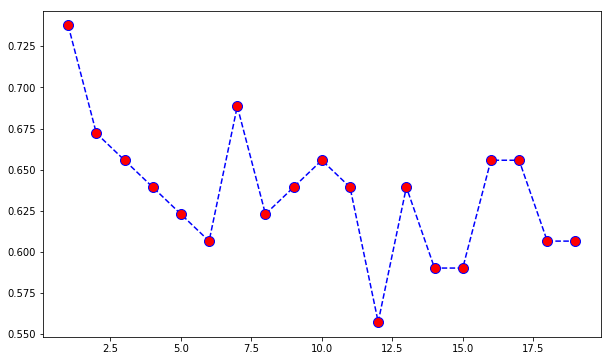

In [106]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20), errors,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

In [107]:
knn6 = KNeighborsClassifier(n_neighbors=6)
knn6.fit(X_train, y_train)
pred6 = knn6.predict(X_test)
print(confusion_matrix(y_test, pred6))
print(classification_report(y_test, pred6))
print(accuracy_score(y_test, pred6))

[[15  9  7]
 [ 7  5  7]
 [ 5  2  4]]
              precision    recall  f1-score   support

        High       0.56      0.48      0.52        31
         Low       0.31      0.26      0.29        19
      Medium       0.22      0.36      0.28        11

   micro avg       0.39      0.39      0.39        61
   macro avg       0.36      0.37      0.36        61
weighted avg       0.42      0.39      0.40        61

0.39344262295081966


In [109]:
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train, y_train)
pred10 = knn10.predict(X_test)
print(confusion_matrix(y_test, pred10))
print(classification_report(y_test, pred10))
print(accuracy_score(y_test, pred10))

[[10 11 10]
 [ 7  7  5]
 [ 3  4  4]]
              precision    recall  f1-score   support

        High       0.50      0.32      0.39        31
         Low       0.32      0.37      0.34        19
      Medium       0.21      0.36      0.27        11

   micro avg       0.34      0.34      0.34        61
   macro avg       0.34      0.35      0.33        61
weighted avg       0.39      0.34      0.35        61

0.3442622950819672


[[13  4 14]
 [ 6  5  8]
 [ 3  1  7]]
              precision    recall  f1-score   support

        High       0.59      0.42      0.49        31
         Low       0.50      0.26      0.34        19
      Medium       0.24      0.64      0.35        11

   micro avg       0.41      0.41      0.41        61
   macro avg       0.44      0.44      0.40        61
weighted avg       0.50      0.41      0.42        61

